In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
data = load_breast_cancer()
X_bc = pd.DataFrame(data.data, columns=data.feature_names)
y_bc = data.target

# Standardize
scaler_bc = StandardScaler()
X_bc_scaled = scaler_bc.fit_transform(X_bc)

# Target classes
target_names = list(data.target_names)  # ['malignant', 'benign']


In [2]:
from sklearn.decomposition import PCA

pca_bc = PCA(n_components=2)
X_bc_pca = pca_bc.fit_transform(X_bc_scaled)


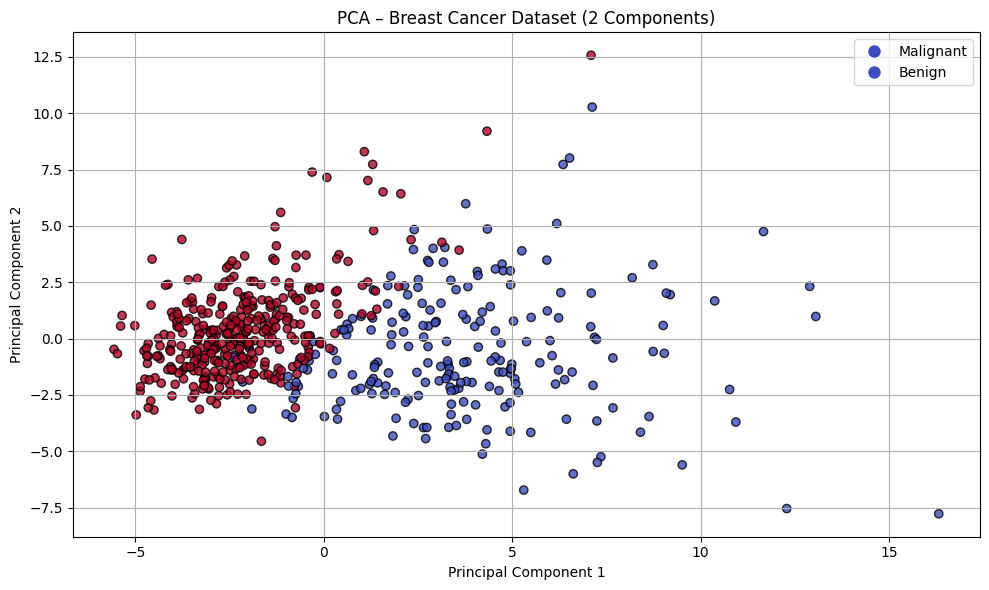

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_bc_pca[:, 0], X_bc_pca[:, 1], c=y_bc, cmap='coolwarm', edgecolor='k', alpha=0.8)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA – Breast Cancer Dataset (2 Components)")
plt.grid(True)

legend_labels = ['Malignant', 'Benign']
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markerfacecolor=plt.cm.coolwarm(i), markersize=10)
           for i, label in enumerate(legend_labels)]
plt.legend(handles=handles)
plt.tight_layout()
plt.show()


In [10]:
import plotly.express as px

# Prepare dataframe for Plotly
df = pd.DataFrame(X_bc_pca, columns=["PC1", "PC2"])
y = data.target
df["class"] = [target_names[label] for label in y]  # assign class labels as strings

# Create interactive plot
fig = px.scatter(
    df,
    x="PC1", y="PC2",
    color="class",
    title="Interactive PCA (2D) – Breast Cancer Dataset",
    width=1000,     # ✅ Width of plot in pixels
    height=700,     # ✅ Height of plot in pixels
    opacity=0.8
)

fig.show()


In [ ]:
# Load and scale data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
target_names = data.target_names  # ['malignant', 'benign']

X_scaled = StandardScaler().fit_transform(X)

# Apply PCA with 3 components
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_scaled)

# Build DataFrame
df_3d = pd.DataFrame(X_pca_3d, columns=["PC1", "PC2", "PC3"])
df_3d["class"] = [target_names[i] for i in y]

# Interactive 3D plot
fig = px.scatter_3d(
    df_3d,
    x="PC1", y="PC2", z="PC3",
    color="class",
    title="3D Interactive PCA – Breast Cancer Dataset",
    width=1200,       # ✅ Width in pixels
    height=800,       # ✅ Height in pixels
    opacity=0.8
)

fig.show()
